# Data Cleaning, Exploratory Data Analysis (EDA) and Preprocessing

In this notebook, I will review the datasets which have been scraped and perform data cleaning and exploration of the data. Subsequently, I will preprocess the data to prepare it for modelling. 

Contents:
- [Imports](#Import-libraries-and-data)
- [Data cleaning and preprocessing](#Data-cleaning-and-preprocessing)
- [WordCloud](#View-wordcloud)

### Import libraries and data

In [1]:
# import libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import nltk
# nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import re
from nltk.tokenize import RegexpTokenizer
from prettytable import PrettyTable
# !pip install wordcloud
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt

In [2]:
# import data
titles = pd.read_csv('../data/titles.csv', skipinitialspace = True)
comments = pd.read_csv('../data/comments.csv', skipinitialspace = True)

In [3]:
#check
titles.head()

,titles,subreddit
0,Twitter’s ban on Trump strips US of ‘moral hig...,Conservative
1,Parler finds refuge with right-leaning webhost...,Conservative
2,Sorry Cleveland,Conservative
3,Elon Musk: A lot of people are going to be sup...,Conservative
4,Democrat Law Professor: Trump Never Actually C...,Conservative


In [4]:
titles.tail()

,titles,subreddit
1496,Georgia Democratic lawmaker to seek censure of...,democrats
1497,"Trump rewarding allies Nunes, Jordan with Meda...",democrats
1498,Biden ALREADY More Popular Than Trump's Ever Been,democrats
1499,Election Day Voting in 2020 Took Longer in Ame...,democrats
1500,Skid Mark President,democrats


In [5]:
comments.head()

,comments,subreddit
0,Looking for debate? Head to the public section...,Conservative
1,Except their lawyers have dropped Parler as a ...,Conservative
2,Republicans had six years to do something abou...,Conservative
3,/r/news has been celebrating all day. They lov...,Conservative
4,I wish him luck but what can he do at this poi...,Conservative


In [6]:
comments.tail()

,comments,subreddit
4816,Im fine with them being labeled as terrorists....,democrats
4817,they need to be put on trial you mean?\n\nThe ...,democrats
4818,> They should be arrested with bail\n\nWhy wit...,democrats
4819,"Yeah, I think most of on the left want to see ...",democrats
4820,"Yeah, the people know him beat don't think to ...",democrats


### Data cleaning and preprocessing
I will use the 'subreddit' column as the supervisor so this is the target variable. As for the feature to train on, I will use the 'title' column and also the 'comments', both of which will be preprocessed (by removing punctuations, and expanding contractions (Sarkar, 2018)). 

For each set of features (ie. title and comments) respectively, I will create a corpus using lemmatizing and stemming separately. 

In [7]:
#contraction map (dipanjanS, 2018)
CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

**Lemmatizing**

In [8]:
def process_words_lemm(df, col):
    #function processes words by lemmatizing, tokenizing, expanding contractions, changing to lowercase and removing punctuations
    def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):

        contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
        def expand_match(contraction):
            match = contraction.group(0)
            first_char = match[0]
            expanded_contraction = contraction_mapping.get(match)\
                                    if contraction_mapping.get(match)\
                                    else contraction_mapping.get(match.lower())                       
            expanded_contraction = first_char+expanded_contraction[1:]
            return expanded_contraction

        expanded_text = contractions_pattern.sub(expand_match, text)
        expanded_text = re.sub("'", "", expanded_text)
        return expanded_text
    
    tokenizer = RegexpTokenizer(r'\w+')
    lemmatizer = WordNetLemmatizer()
    
    df[col] = [lemmatizer.lemmatize(' '.join(tokenizer.tokenize(expand_contractions(str(i).lower(), contraction_mapping=CONTRACTION_MAP)))) for i in df[col]]

    return df

Apply function to each subreddit dataframe and check that changes are effectively put through.

In [9]:
titles_lemm = process_words_lemm(titles, 'titles')
titles_lemm.head()

,titles,subreddit
0,twitter s ban on trump strips us of moral high...,Conservative
1,parler finds refuge with right leaning webhost...,Conservative
2,sorry cleveland,Conservative
3,elon musk a lot of people are going to be supe...,Conservative
4,democrat law professor trump never actually ca...,Conservative


In [10]:
comments_lemm = process_words_lemm(comments, 'comments')
comments_lemm.head()

,comments,subreddit
0,looking for debate head to the public sections...,Conservative
1,except their lawyers have dropped parler as a ...,Conservative
2,republicans had six years to do something abou...,Conservative
3,r news has been celebrating all day they love it,Conservative
4,i wish him luck but what can he do at this poi...,Conservative


**Stemming**

In [11]:
def process_words_stemm(df, col):
    #function processes title by stemming, then tokenizing, expanding contractions, changing to lowercase and removing punctuations
    def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):

        contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
        def expand_match(contraction):
            match = contraction.group(0)
            first_char = match[0]
            expanded_contraction = contraction_mapping.get(match)\
                                    if contraction_mapping.get(match)\
                                    else contraction_mapping.get(match.lower())                       
            expanded_contraction = first_char+expanded_contraction[1:]
            return expanded_contraction

        expanded_text = contractions_pattern.sub(expand_match, text)
        expanded_text = re.sub("'", "", expanded_text)
        return expanded_text
    
    tokenizer = RegexpTokenizer(r'\w+')
    p_stemmer = PorterStemmer()
    
    df[col] = [p_stemmer.stem(' '.join(tokenizer.tokenize(expand_contractions(str(i).lower(), contraction_mapping=CONTRACTION_MAP)))) for i in df[col]]

    return df

Apply function to each subreddit dataframe and check that changes are effectively put through.

In [12]:
titles_stemm = process_words_stemm(titles, 'titles')
titles_stemm.head()

,titles,subreddit
0,twitter s ban on trump strips us of moral high...,Conservative
1,parler finds refuge with right leaning webhost...,Conservative
2,sorry cleveland,Conservative
3,elon musk a lot of people are going to be supe...,Conservative
4,democrat law professor trump never actually ca...,Conservative


In [13]:
comments_stemm = process_words_stemm(comments, 'comments')
comments_stemm.head()

,comments,subreddit
0,looking for debate head to the public sections...,Conservative
1,except their lawyers have dropped parler as a cli,Conservative
2,republicans had six years to do something abou...,Conservative
3,r news has been celebrating all day they love it,Conservative
4,i wish him luck but what can he do at this poi...,Conservative


So now we have 4 dataframe sets to model with:
1. titles_lemm
2. titles_stemm
3. comments_lemm
4. comments_stemm

To prepare the data, I first change the subreddit columns to a binary.

In [14]:
# change subreddits to integers
titles_lemm['subreddit'][titles_lemm['subreddit'] == 'Conservative'] = 1
titles_lemm['subreddit'][titles_lemm['subreddit'] == 'democrats'] = 0

titles_stemm['subreddit'][titles_stemm['subreddit'] == 'Conservative'] = 1
titles_stemm['subreddit'][titles_stemm['subreddit'] == 'democrats'] = 0

comments_lemm['subreddit'][comments_lemm['subreddit'] == 'Conservative'] = 1
comments_lemm['subreddit'][comments_lemm['subreddit'] == 'democrats'] = 0

comments_stemm['subreddit'][comments_stemm['subreddit'] == 'Conservative'] = 1
comments_stemm['subreddit'][comments_stemm['subreddit'] == 'democrats'] = 0

In [15]:
#check
titles_lemm.head()

,titles,subreddit
0,twitter s ban on trump strips us of moral high...,1
1,parler finds refuge with right leaning webhost...,1
2,sorry cleveland,1
3,elon musk a lot of people are going to be supe...,1
4,democrat law professor trump never actually ca...,1


In [16]:
comments_stemm.tail()

,comments,subreddit
4816,im fine with them being labeled as terrorists ...,0
4817,they need to be put on trial you mean the patr...,0
4818,they should be arrested with bail why with bail,0
4819,yeah i think most of on the left want to see p...,0
4820,yeah the people know him beat do not think to ...,0


### View wordcloud

In [17]:
# obtained from stackoverflow (Alvas, 2017)
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40,
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

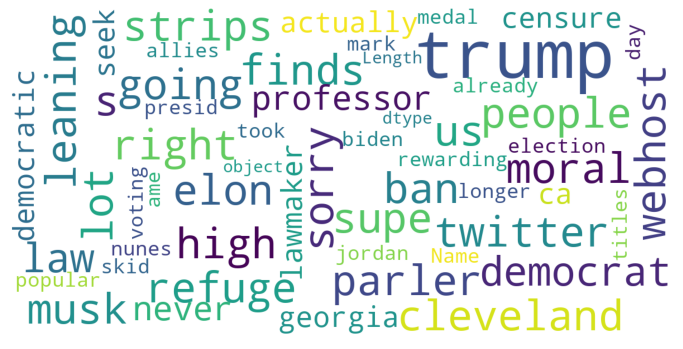

In [18]:
#view wordcloud for titles (use lemmatized dataframe as stemming is more violent and i want to see more raw words)
show_wordcloud(titles_lemm['titles'])

Most frequent word in titles is **Trump**, which is no surprise. At the time this project was done, it was days before the transition for Biden as President of the United States, and Trump (the current President) and his supporters did not make it easy. There was a riot at the US Capitol, innocent bystanders were killed, some policemen who were truly loyal to Trump failed to uphold their duty during the violence. Several articles came up on these on various news channels. 

**Twitter** came up here because Trump's twitter acount was initally suspended for 6 hours but it has since been permanently suspended due to risk of further incitement of violence (in relation to the US Capital riots). (Twitter Inc. 2021)

**Elon Musk** came up here because several news channels reported that his net worth exceeded Jeff Bezos (Amazon CEO) to become the richest person in the world. 

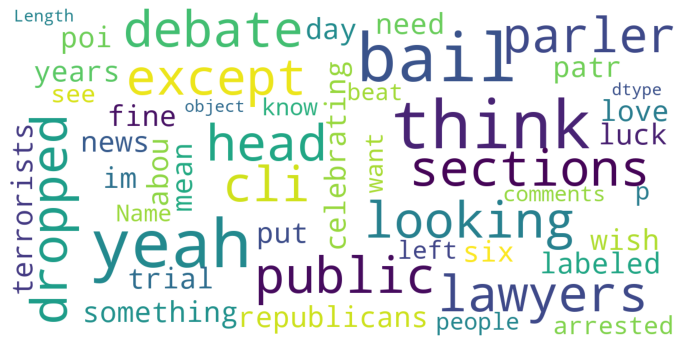

In [19]:
#view wordcloud for comments
show_wordcloud(comments_lemm['comments'])

**bail, parler, lawyers** are related to the same issue. Parler is a social network platform known for embracing people who are banned by Twitter, YouTube and other platforms. Parler's site is supported by Amazon Web Services (AWS). Amazon decided to effectively terminate Parler's account as it is deemed to be directly contributing to violence by Trump supporters. Parler has since filed a federal lawsuit against Amazon for removing supporting of its website. (Hayes, 2021)

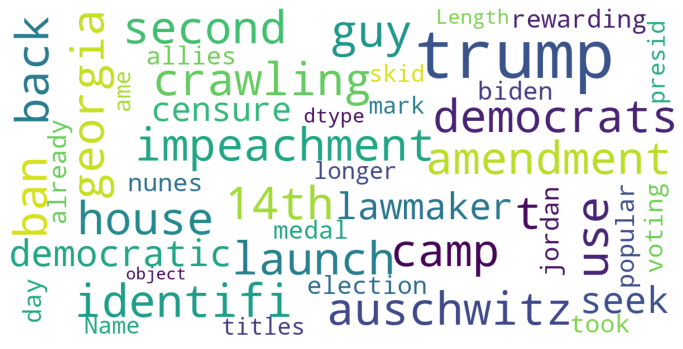

In [30]:
#view wordcloud for comments classified under democrats
dem_titles = titles_lemm[titles_lemm['subreddit'] == 0]
con_titles = titles_lemm[titles_lemm['subreddit'] == 1]
show_wordcloud(dem_titles['titles'])

In the democrats camp, we see **trump** being the most used, along with **impeachment**. The **14th amendment** , Section 3 which provided an alternative path for disqualification of a person from holding office, if they have engageed in "insurrection or rebellion" in the United States (which we saw in the US Capitol riots.(Wolfe, 2021)

This shows how democrats are discussion options to remove Trump from office for inciting a mob that stormed the Capital, days before Biden takes over the Presidency. 

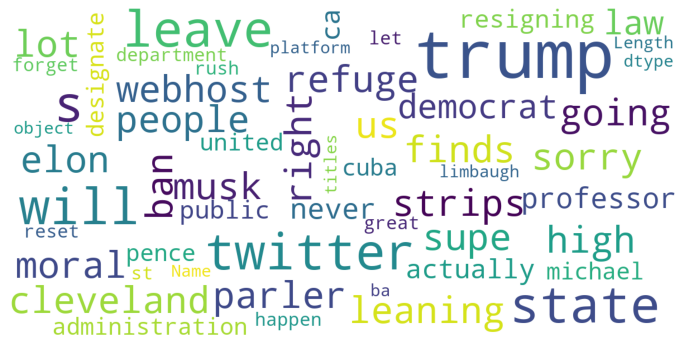

In [31]:
show_wordcloud(con_titles['titles'])

Over at the conservatives camp, **trump** is equally mentioned, along with **twitter**. Twitter had so much mentions probably because when Twitter banned Trump, the conservatives were livid and expressed their displeasure in this subreddit.  

In [124]:
# view number of data collected in table 
x = PrettyTable(header_style = 'title', max_table_width = 120)
x.field_names = [" ", "titles_lemm", "titles_stemm", "comments_lemm", "comments_stemm"]
x.add_row(["proportion of class", 
           titles_lemm['subreddit'].value_counts(normalize = True),
           titles_stemm['subreddit'].value_counts(normalize = True),
           comments_lemm['subreddit'].value_counts(normalize = True),
           comments_stemm['subreddit'].value_counts(normalize = True)])
print(x)

+----------------+--------------------------+--------------------------+--------------------------+--------------------------+
|                |       Titles_Lemm        |       Titles_Stemm       |      Comments_Lemm       |      Comments_Stemm      |
+----------------+--------------------------+--------------------------+--------------------------+--------------------------+
| proportion of  |      0    0.664224       |      0    0.664224       |      1    0.881145       |      1    0.881145       |
|     class      |      1    0.335776       |      1    0.335776       |      0    0.118855       |      0    0.118855       |
|                | Name: subreddit, dtype:  | Name: subreddit, dtype:  | Name: subreddit, dtype:  | Name: subreddit, dtype:  |
|                |         float64          |         float64          |         float64          |         float64          |
+----------------+--------------------------+--------------------------+--------------------------+------------

From here, it is clear that the classes are imbalanced for both the comments and title dataframe. There are several ways to deal with imbalanced classes (Brownlee, 2020). One is <u>random oversampling</u>, which randomly duplicates examples in the minority class. This will be done at the modelling stage in the next notebook. 

In [125]:
# save out preprocessed data to csv
titles_lemm.to_csv("../data/titles_lemm.csv", index = False)
titles_stemm.to_csv("../data/titles_stemm.csv", index = False)
comments_lemm.to_csv("../data/comments_lemm.csv", index = False)
comments_stemm.to_csv("../data/comments_stemm.csv", index = False)

Data is now ready for modelling! Modelling and tuning will be done in [this notebook](03-modeling-tuning-conclusion.ipynb).

### References

"A Deep Dive Into Sourcing on Reddit – Part 4 Understanding Flair" (Mathew, 2019)
https://www.sourcecon.com/a-deep-dive-into-sourcing-on-reddit-part-4-understanding-flair/

"Practical machine learning with python, Contraction Map" (dipanjanS, 2018)
https://github.com/dipanjanS/practical-machine-learning-with-python/blob/master/bonus%20content/nlp%20proven%20approach/contractions.py

"A Practitioner's Guide to Natural Language Processing (Part I) — Processing & Understanding Text" (Sarkar, 2018)
https://towardsdatascience.com/a-practitioners-guide-to-natural-language-processing-part-i-processing-understanding-text-9f4abfd13e72

"Random Oversampling and Undersampling for Imbalanced Classification" (Brownlee, 2020)
https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/

"How to create a word cloud from a corpus in Python?" (Alvas, 2017)
https://stackoverflow.com/questions/16645799/how-to-create-a-word-cloud-from-a-corpus-in-python

"Permanent suspension of @realDonaldTrump" (Twitter Inc. 2021)
https://blog.twitter.com/en_us/topics/company/2020/suspension.html

"Amazon Rips Parler Lawsuit, Calling Companies "Unable or Unwilling" to Police Its Site" (Hayes, 2021)
https://deadline.com/2021/01/parler-sues-amazon-trying-to-kill-site-donald-trump-1234671259/

"Explainer: Impeachment or the 14th Amendment - Can Trump be barred from future office?" (Wolfe, 2021)
https://www.reuters.com/article/us-usa-trump-impeachment/explainer-impeachment-or-the-14th-amendment-can-trump-be-barred-from-future-office-idUSKBN29I356